# Data Exploration

**Description**: https://www.kaggle.com/c/zillow-prize-1

**Goal**: Predict the log-error between their Zestimate and the actual sale price for the months in Fall 2017, given all the features of a home in three counties (Los Angeles, Orange and Ventura, California) in 2016.

**Target variable**: logerror

#### Train/Test split

- You are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.
- The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
- The test data in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.
- The rest of the test data, which is used for calculating the private leaderboard, is all the properties in October 15, 2017, to December 15, 2017. This period is called the "sales tracking period", during which we will not be taking any submissions.
- You are asked to predict 6 time points for all properties: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710), November 2017 (201711), and December 2017 (201712).
- Not all the properties are sold in each time period. If a property was not sold in a certain time period, that particular row will be ignored when calculating your score.
- If a property is sold multiple times within 31 days, we take the first reasonable value as the ground truth. By "reasonable", we mean if the data seems wrong, we will take the transaction that has a value that makes more sense.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIG_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title

import seaborn as sns

sns.set_palette('dark')
sns.set(font_scale = 1.5)

%matplotlib inline

In [2]:
train_2016 = pd.read_csv('train_2016.csv', parse_dates=['transactiondate']) # index_col = 'parcelid'
properties_2016 = pd.read_csv('properties_2016.csv', dtype={'hashottuborspa': np.bool_, 
                                                            'propertycountylandusecode': 'str',
                                                            'propertyzoningdesc': 'str',
                                                            'fireplaceflag': np.bool_,
                                                            'taxdelinquencyflag': 'str'})

In [3]:
for i in (22,32,34,49,55):
    column_name = properties_2016.columns[i]
    print column_name, properties_2016[properties_2016[column_name].notnull()][column_name][:1]
    print

hashottuborspa 1340    True
Name: hashottuborspa, dtype: object

propertycountylandusecode 0    010D
Name: propertycountylandusecode, dtype: object

propertyzoningdesc 1    LCA11*
Name: propertyzoningdesc, dtype: object

fireplaceflag 10353    True
Name: fireplaceflag, dtype: object

taxdelinquencyflag 22    Y
Name: taxdelinquencyflag, dtype: object



In [4]:
properties_2016.hashottuborspa = properties_2016.hashottuborspa.fillna(False).astype(np.bool_)
properties_2016.propertycountylandusecode = properties_2016.propertycountylandusecode.fillna('').astype('str')
properties_2016.propertyzoningdesc = properties_2016.propertyzoningdesc.fillna('').astype('str')
properties_2016.fireplaceflag = properties_2016.fireplaceflag.fillna(False).astype(np.bool_)
properties_2016.taxdelinquencyflag = properties_2016.taxdelinquencyflag.fillna('N').astype('str')

In [5]:
train_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90811 entries, 0 to 90810
Data columns (total 3 columns):
parcelid           90811 non-null int64
logerror           90811 non-null float64
transactiondate    90811 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [6]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [7]:
train_2016.describe()

,parcelid,logerror
count,"90,811.00","90,811.00"
mean,"12,993,597.57",0.01
std,"2,503,999.64",0.16
min,"10,711,738.00",-4.61
25%,"11,564,405.00",-0.03
50%,"12,553,718.00",0.01
75%,"14,237,199.00",0.04
max,"162,960,842.00",4.74


In [8]:
properties_2016.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"2,985,217.00","811,519.00","6,061.00","1,628.00","2,973,755.00","2,973,767.00","12,629.00","1,938,488.00","2,856,305.00","17,096.00",...,"2,647.00","2,925,289.00","682,069.00","2,930,235.00","2,942,667.00","2,973,778.00","2,917,484.00","2,953,967.00","56,464.00","2,910,091.00"
mean,"13,325,858.36",1.93,7.20,646.88,2.21,3.09,3.73,5.78,2.30,66.00,...,278.30,"1,964.26",1.40,"170,883.58","420,478.99","2,015.00","252,478.03","5,377.61",13.89,"60,484,312,212,563.77"
std,"7,909,966.39",3.15,2.44,538.79,1.08,1.28,0.50,1.81,1.00,0.00,...,369.73,23.44,0.54,"402,068.34","726,346.65",0.04,"445,013.17","9,183.11",2.58,"324,903,454,737.40"
min,"10,711,725.00",1.00,2.00,20.00,0.00,0.00,1.00,1.00,1.00,66.00,...,10.00,"1,801.00",1.00,1.00,1.00,"2,000.00",1.00,1.34,0.00,-1.00
25%,"11,643,707.00",1.00,7.00,272.00,2.00,2.00,3.00,4.00,2.00,66.00,...,96.00,"1,950.00",1.00,"74,800.00","179,675.00","2,015.00","74,836.00","2,461.07",14.00,"60,374,002,041,015.00"
50%,"12,545,094.00",1.00,7.00,534.00,2.00,3.00,4.00,7.00,2.00,66.00,...,168.00,"1,963.00",1.00,"122,590.00","306,086.00","2,015.00","167,042.00","3,991.78",14.00,"60,375,715,022,011.00"
75%,"14,097,122.00",1.00,7.00,847.25,3.00,4.00,4.00,7.00,3.00,66.00,...,320.00,"1,981.00",2.00,"196,889.00","488,000.00","2,015.00","306,918.00","6,201.01",15.00,"60,590,423,191,014.00"
max,"169,601,949.00",13.00,27.00,"8,516.00",20.00,20.00,5.00,12.00,20.00,66.00,...,"6,141.00","2,015.00",41.00,"251,486,000.00","282,786,000.00","2,016.00","90,246,219.00","3,458,861.12",99.00,"483,030,105,084,015.00"


In [9]:
xl = pd.ExcelFile('zillow_data_dictionary.xlsx')
xl.sheet_names

[u'Data Dictionary',
 u'HeatingOrSystemTypeID',
 u'PropertyLandUseTypeID',
 u'StoryTypeID',
 u'AirConditioningTypeID',
 u'ArchitecturalStyleTypeID',
 u'TypeConstructionTypeID',
 u'BuildingClassTypeID']

In [10]:
zillow_data_dictionary = xl.parse(xl.sheet_names[0])
zillow_data_dictionary.Feature = zillow_data_dictionary.Feature.apply(lambda x: x.replace("'", ""))
zillow_data_dictionary

,Feature,Description
0,airconditioningtypeid,Type of cooling system present in the home (if any)
1,architecturalstyletypeid,"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,basementsqft,Finished living area below or partially below ground level
3,bathroomcnt,Number of bathrooms in home including fractional bathrooms
4,bedroomcnt,Number of bedrooms in home
5,buildingqualitytypeid,Overall assessment of condition of the building from best (lowest) to worst (highest)
6,buildingclasstypeid,"The building framing type (steel frame, wood frame, concrete/brick)"
7,calculatedbathnbr,Number of bathrooms in home including fractional bathroom
8,decktypeid,Type of deck (if any) present on parcel
9,threequarterbathnbr,Number of 3/4 bathrooms in house (shower + sink + toilet)


In [11]:
train_2016.shape, properties_2016.shape

((90811, 3), (2985217, 58))

In [12]:
train_2016.head(10)

,parcelid,logerror,transactiondate
0,11016594,0.03,2016-01-01
1,14366692,-0.17,2016-01-01
2,12098116,-0.00,2016-01-01
3,12643413,0.02,2016-01-02
4,14432541,-0.01,2016-01-02
5,11509835,-0.27,2016-01-02
6,12286022,0.04,2016-01-02
7,17177301,0.16,2016-01-02
8,14739064,-0.00,2016-01-02
9,14677559,0.08,2016-01-03


In [13]:
properties_2016.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,nan,False,nan,9.00,"2,015.00",9.00,nan,N,nan,nan
1,10759547,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,nan,False,nan,"27,516.00","2,015.00","27,516.00",nan,N,nan,nan
2,10843547,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,nan,False,"650,756.00","1,413,387.00","2,015.00","762,631.00","20,800.37",N,nan,nan
3,10859147,nan,nan,nan,0.00,0.00,3.00,7.00,nan,nan,...,1.00,False,"571,346.00","1,156,834.00","2,015.00","585,488.00","14,557.57",N,nan,nan
4,10879947,nan,nan,nan,0.00,0.00,4.00,nan,nan,nan,...,nan,False,"193,796.00","433,491.00","2,015.00","239,695.00","5,725.17",N,nan,nan
5,10898347,nan,nan,nan,0.00,0.00,4.00,7.00,nan,nan,...,1.00,False,"176,383.00","283,315.00","2,015.00","106,932.00","3,661.28",N,nan,nan
6,10933547,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,nan,False,"397,945.00","554,573.00","2,015.00","156,628.00","6,773.34",N,nan,nan
7,10940747,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,1.00,False,"101,998.00","688,486.00","2,015.00","586,488.00","7,857.84",N,nan,nan
8,10954547,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,...,nan,False,nan,9.00,"2,015.00",9.00,nan,N,nan,nan
9,10976347,nan,nan,nan,0.00,0.00,3.00,7.00,nan,nan,...,1.00,False,"218,440.00","261,201.00","2,015.00","42,761.00","4,054.76",N,nan,nan


### Missing values

In [14]:
train_2016.isnull().sum(axis=0)

parcelid           0
logerror           0
transactiondate    0
dtype: int64

In [15]:
missing_df = properties_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_perc'] = missing_df.missing_count * 100 / properties_2016.shape[0]

missing_df.loc[missing_df.missing_perc > 90]

,column_name,missing_count,missing_perc
2,architecturalstyletypeid,2979156,99.80
3,basementsqft,2983589,99.95
6,buildingclasstypeid,2972588,99.58
9,decktypeid,2968121,99.43
10,finishedfloor1squarefeet,2782500,93.21
13,finishedsquarefeet13,2977545,99.74
14,finishedsquarefeet15,2794419,93.61
15,finishedsquarefeet50,2782500,93.21
16,finishedsquarefeet6,2963216,99.26
28,poolsizesum,2957257,99.06


In [16]:
missing_df.loc[missing_df.missing_perc > 95].sort_values(['missing_perc', 'column_name'], ascending=[False, True])

,column_name,missing_count,missing_perc
41,storytypeid,2983593,99.95
3,basementsqft,2983589,99.95
46,yardbuildingsqft26,2982570,99.91
2,architecturalstyletypeid,2979156,99.80
43,typeconstructiontypeid,2978470,99.77
13,finishedsquarefeet13,2977545,99.74
6,buildingclasstypeid,2972588,99.58
9,decktypeid,2968121,99.43
16,finishedsquarefeet6,2963216,99.26
28,poolsizesum,2957257,99.06


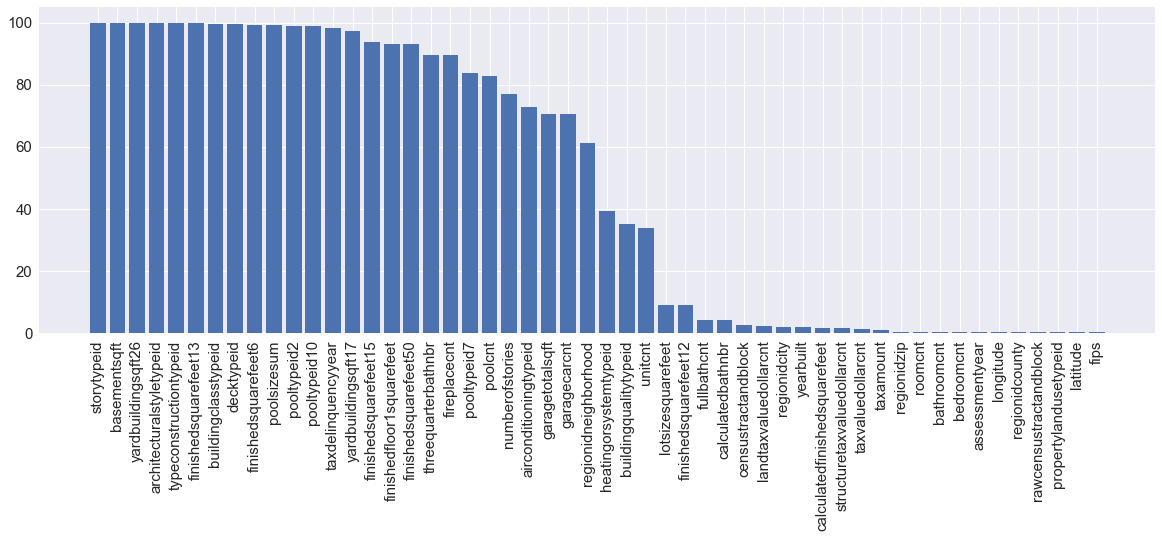

In [17]:
plt.figure(figsize=(20, 6))

top_missing = missing_df.loc[missing_df.missing_perc > 0].sort_values('missing_perc', ascending=False).reset_index()
plt.bar(top_missing.index, top_missing.missing_perc)
plt.xticks(top_missing.index, top_missing.column_name, rotation=90)
plt.show()

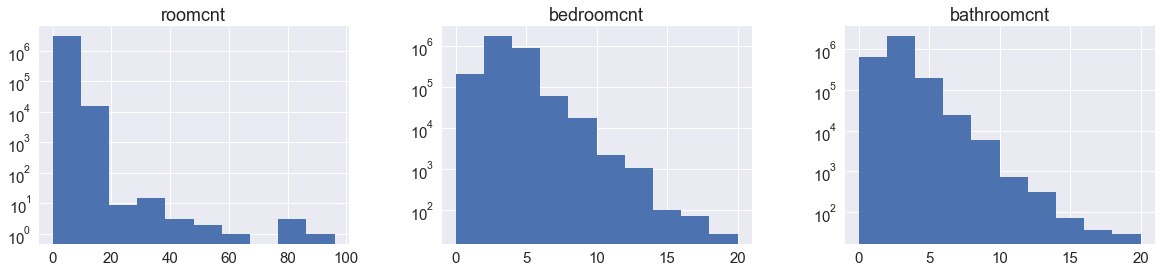

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
selected_columns = ('roomcnt', 'bedroomcnt', 'bathroomcnt')

for i in range(len(selected_columns)):
    properties_2016.hist(column=selected_columns[i], log=True, ax=axes[i]);

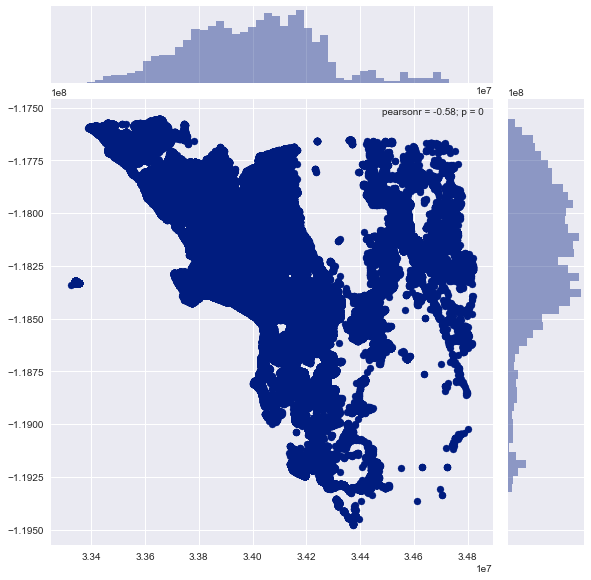

In [19]:
sns.jointplot(x=properties_2016.latitude.values, y=properties_2016.longitude.values, size=8);

In [19]:
float_columns_list = sorted([str(x) for x in properties_2016.select_dtypes(include=[np.float]).columns])

In [20]:
uniques = {}
for column_name in float_columns_list:
    uniques[column_name] = len(properties_2016[column_name].unique())

In [21]:
categorical_columns_list = [k for (k,v) in uniques.items() if v <= 10]
non_categorical_columns_list = [k for (k,v) in uniques.items() if v > 10]

In [22]:
for column_name in categorical_columns_list:
    print column_name
    print properties_2016[column_name].value_counts().reset_index()[column_name].value_counts()
    print

typeconstructiontypeid
14      1
6670    1
3       1
59      1
1       1
Name: typeconstructiontypeid, dtype: int64

buildingclasstypeid
81      1
3161    1
65      1
9265    1
57      1
Name: buildingclasstypeid, dtype: int64

fireplacecnt
15        1
126       1
269643    1
6         1
34407     1
710       1
32        1
2         1
7696      1
Name: fireplacecnt, dtype: int64

regionidcounty
222853     1
2009362    1
741565     1
Name: regionidcounty, dtype: int64

pooltypeid10
36939    1
Name: pooltypeid10, dtype: int64

pooltypeid7
485459    1
Name: pooltypeid7, dtype: int64

storytypeid
1624    1
Name: storytypeid, dtype: int64

poolcnt
517534    1
Name: poolcnt, dtype: int64

threequarterbathnbr
308959    1
46        1
9         1
261       1
2         1
2338      1
16        1
Name: threequarterbathnbr, dtype: int64

fips
222853     1
2009362    1
741565     1
Name: fips, dtype: int64

decktypeid
17096    1
Name: decktypeid, dtype: int64

airconditioningtypeid
8795      1
74236

In [23]:
len(non_categorical_columns_list)

38

/Users/ikononenko/tensorflow/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


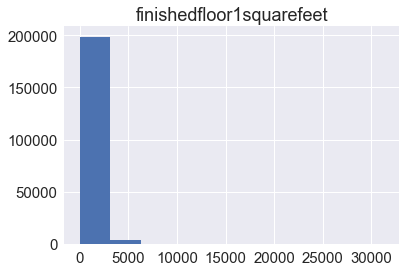

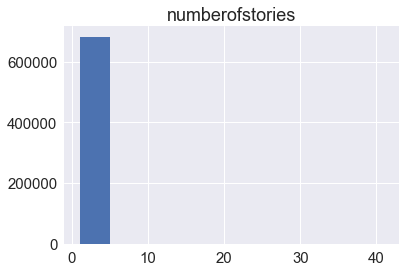

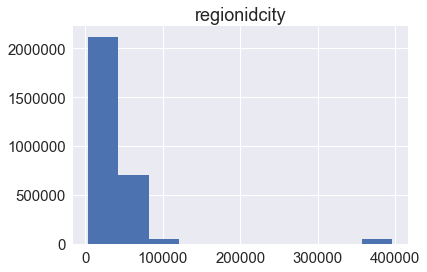

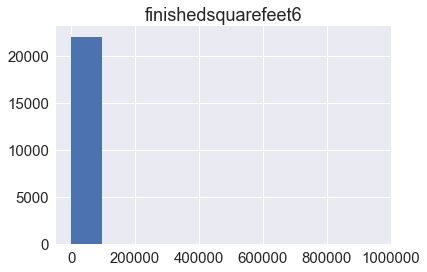

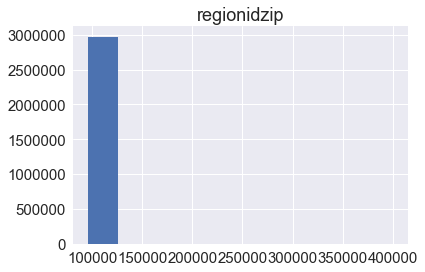

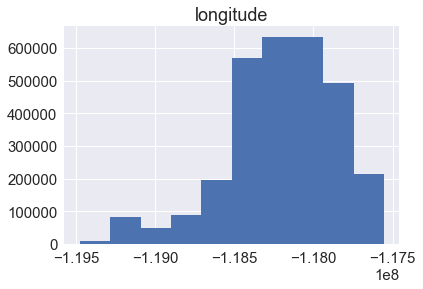

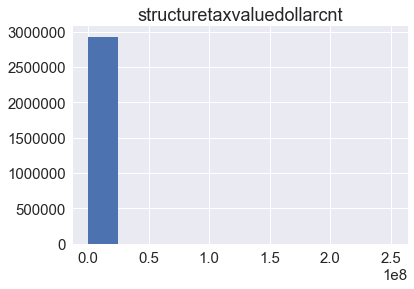

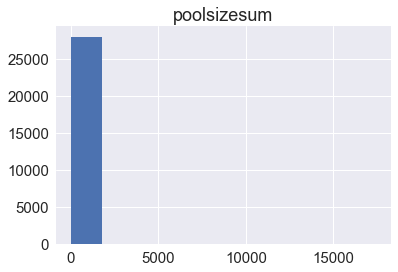

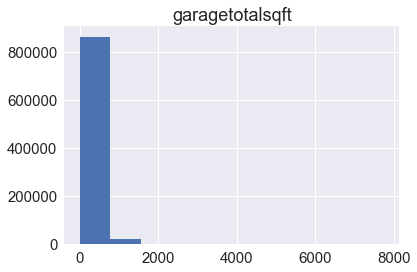

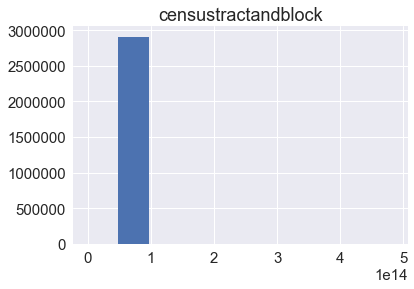

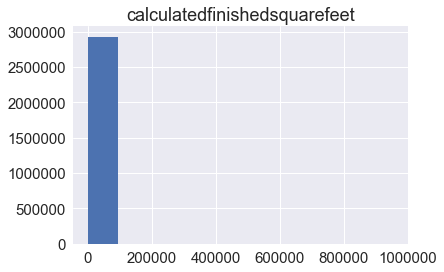

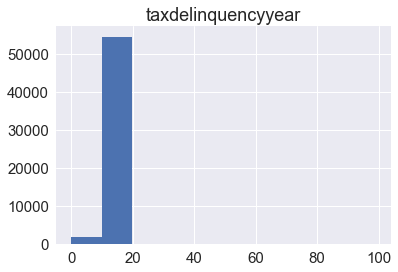

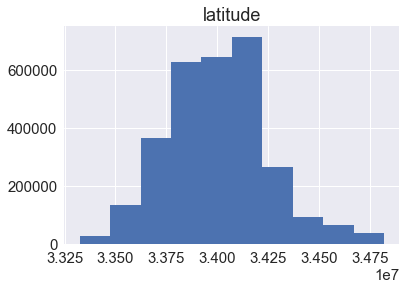

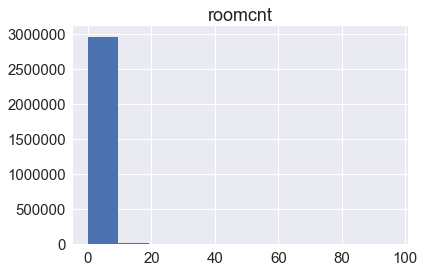

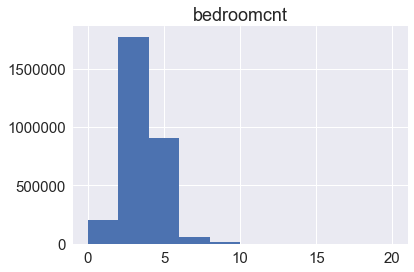

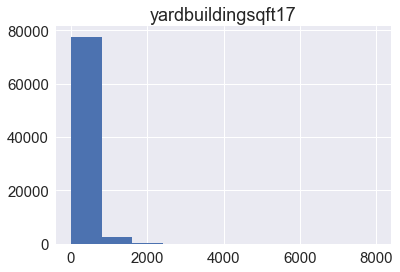

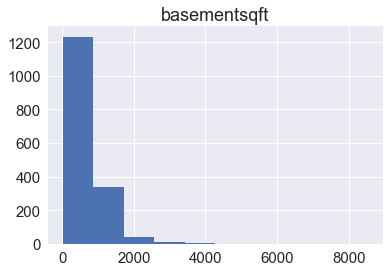

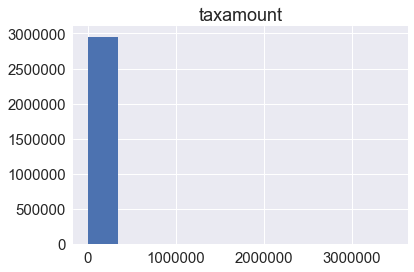

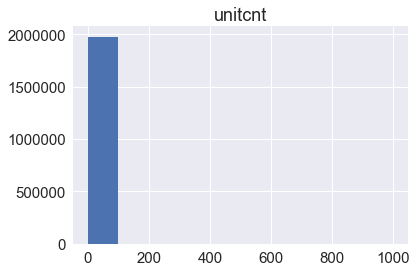

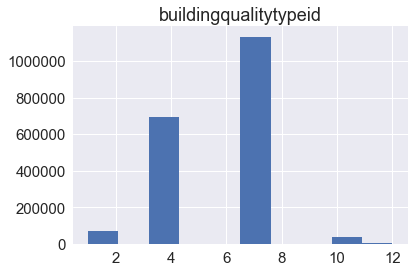

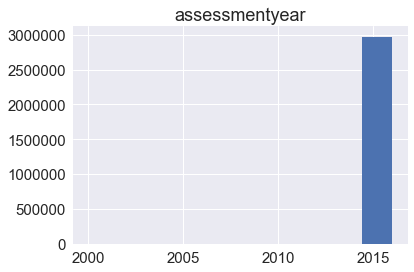

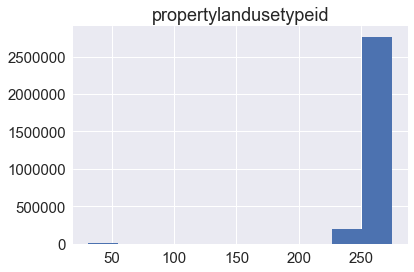

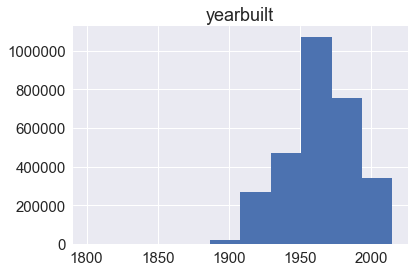

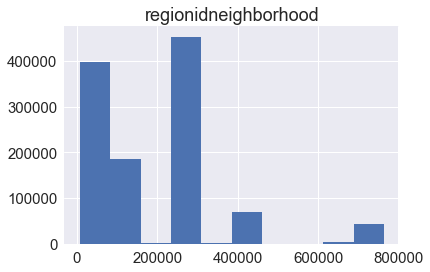

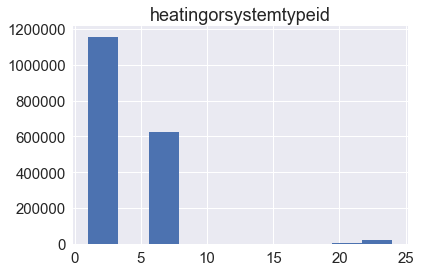

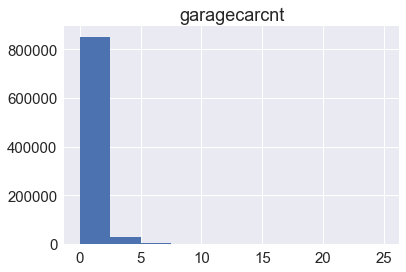

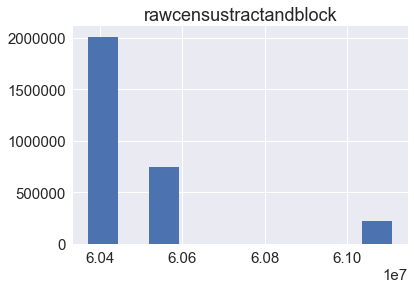

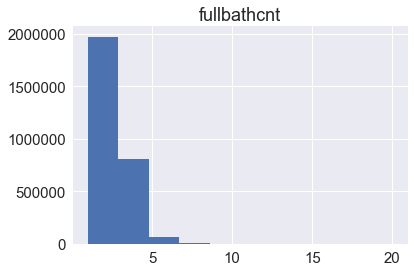

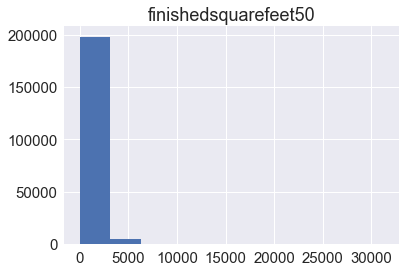

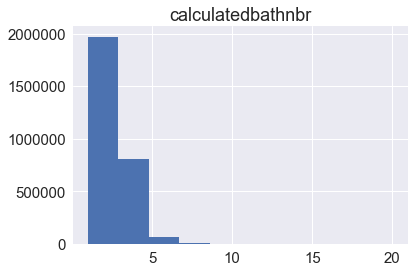

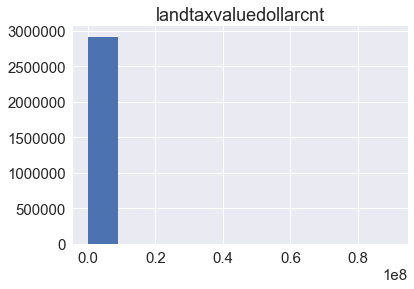

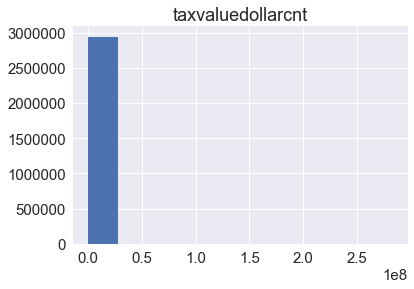

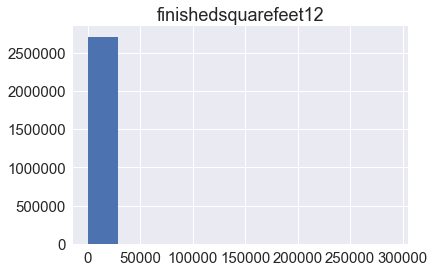

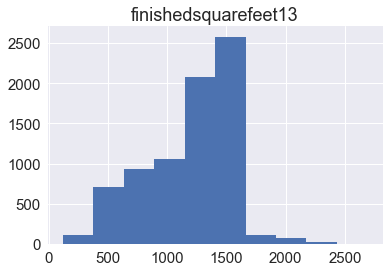

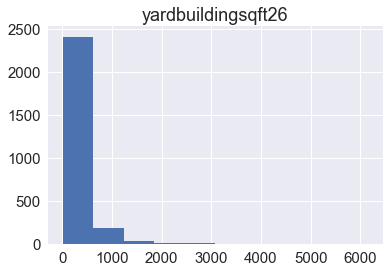

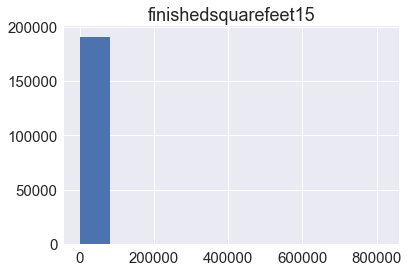

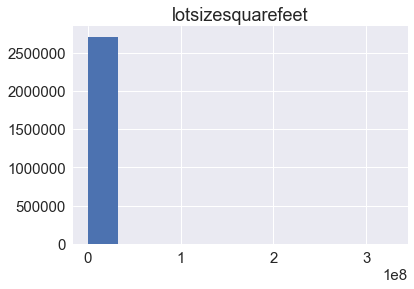

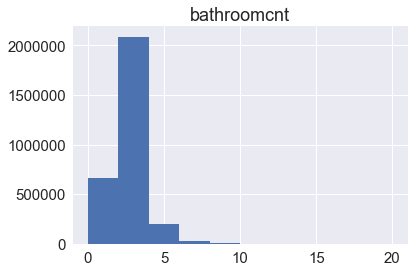

In [24]:
for column_name in non_categorical_columns_list:
    try:
        properties_2016.hist(column=column_name)
    except:
        print "%s is skipped" % column_name

In [25]:
for column_name in non_categorical_columns_list:
    column_mean = np.mean(properties_2016[column_name])
    properties_2016[column_name].fillna(column_mean, inplace=True)
    
    (column_min, column_max) = np.percentile(properties_2016[column_name], [1, 99]).tolist()
    print "For %s min/max/mean: %s, %s, %s " % (column_name, column_min, column_max, column_mean)

    properties_2016[column_name] = np.where(properties_2016[column_name] < column_min, column_mean, properties_2016[column_name])
    properties_2016[column_name] = np.where(properties_2016[column_name] > column_max, column_mean, properties_2016[column_name])

For finishedfloor1squarefeet min/max/mean: 853.0, 1844.0, 1380.63039607 
For numberofstories min/max/mean: 1.0, 2.0, 1.40146378152 
For regionidcity min/max/mean: 5465.0, 396054.0, 34993.3502241 
For finishedsquarefeet6 min/max/mean: 2414.33943912, 2414.33943912, 2414.33943912 
For regionidzip min/max/mean: 95986.0, 97329.0, 96552.6728003 
For longitude min/max/mean: -119220007.84, -117618281.0, -118201934.159 
For structuretaxvaluedollarcnt min/max/mean: 11205.0, 905917.4, 170883.577166 
For poolsizesum min/max/mean: 519.710979971, 519.710979971, 519.710979971 
For garagetotalsqft min/max/mean: 0.0, 720.0, 383.769357397 
For censustractandblock min/max/mean: 6.0371060101e+13, 6.1110078002e+13, 6.04843122126e+13 
For calculatedfinishedsquarefeet min/max/mean: 624.0, 5276.0, 1827.16212369 
For taxdelinquencyyear min/max/mean: 13.8924093228, 14.0, 13.8924093228 
For latitude min/max/mean: 33478828.32, 34678086.36, 34001468.6537 
For roomcnt min/max/mean: 0.0, 9.0, 1.47501834389 
For bedr

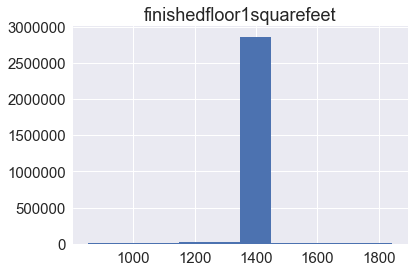

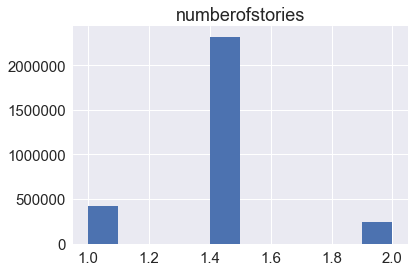

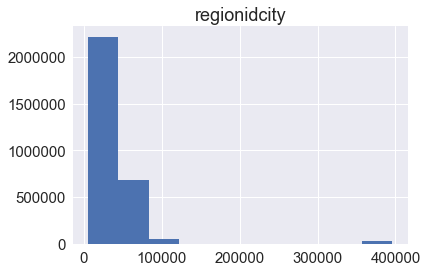

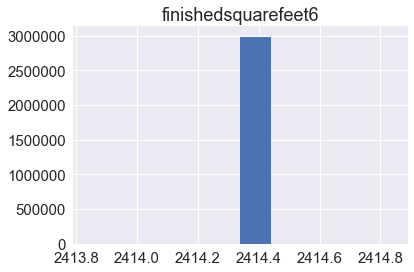

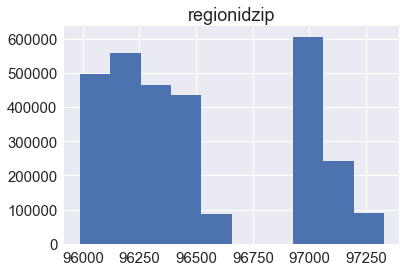

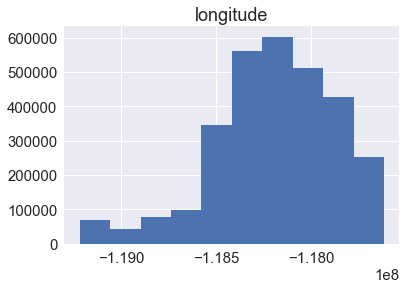

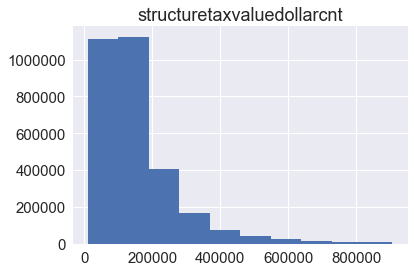

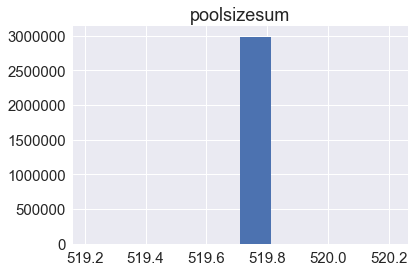

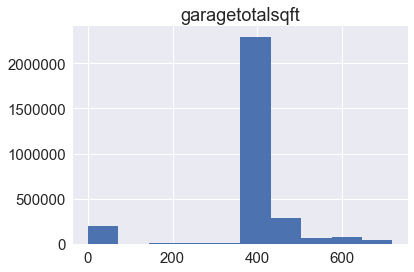

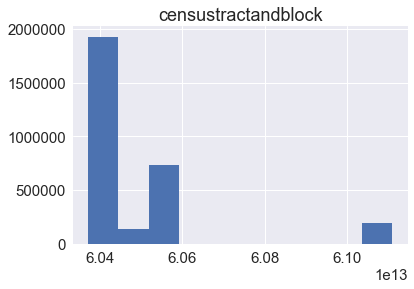

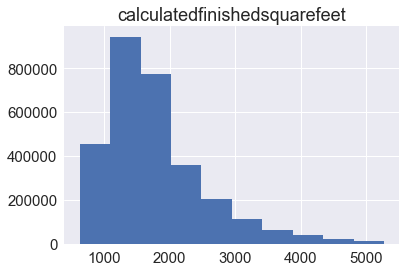

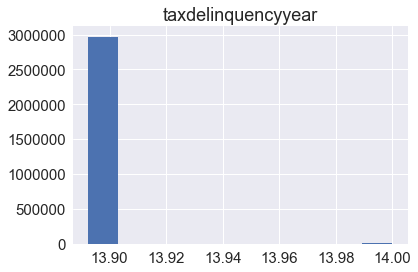

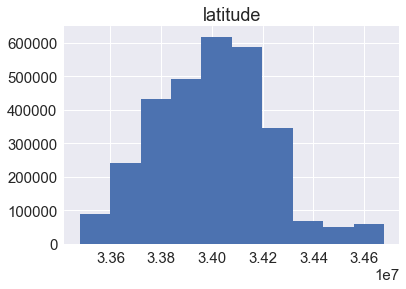

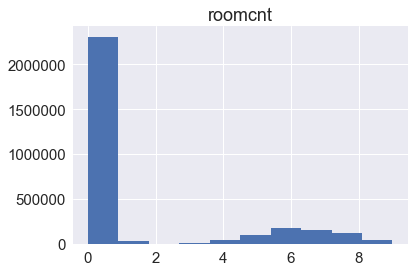

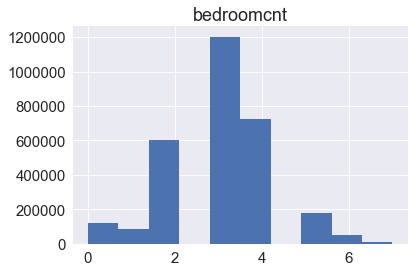

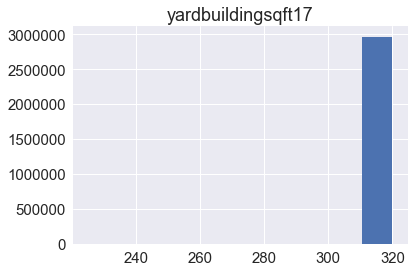

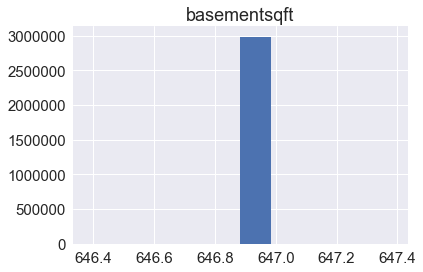

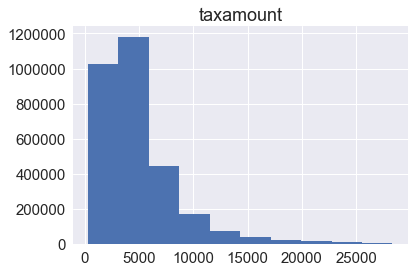

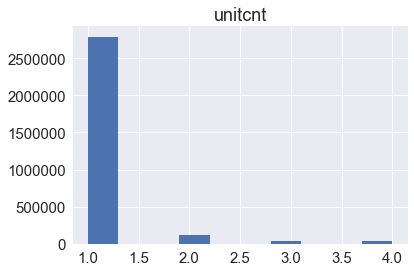

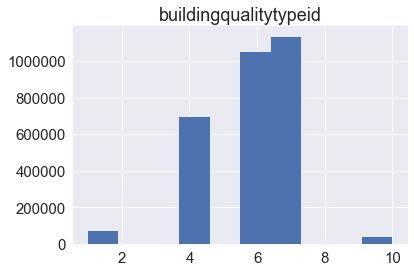

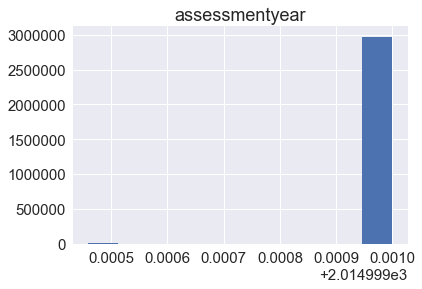

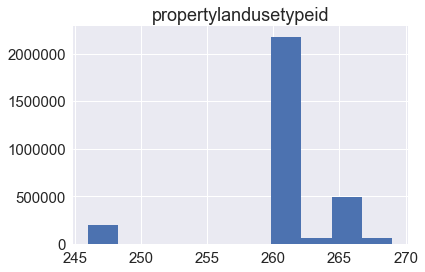

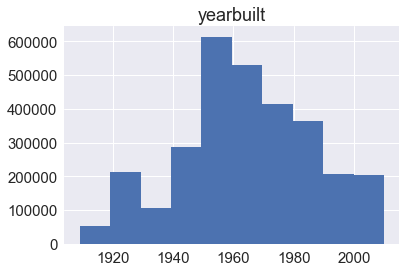

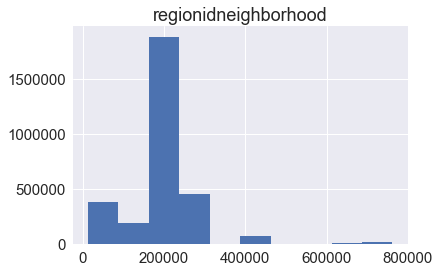

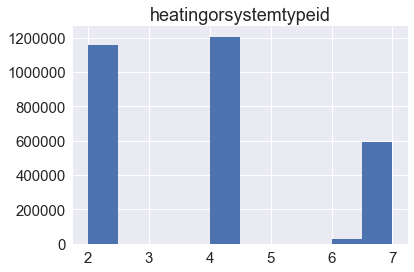

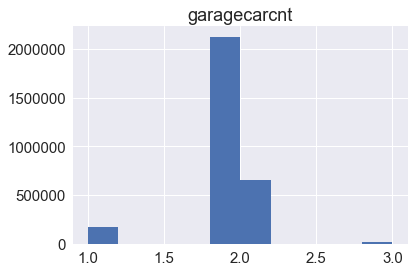

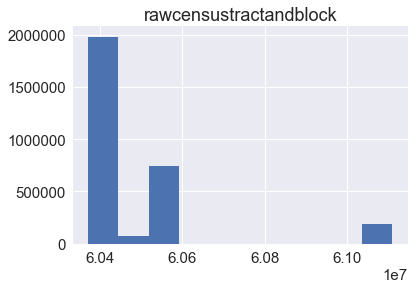

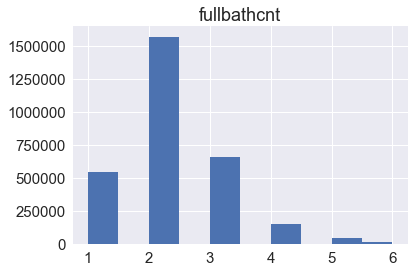

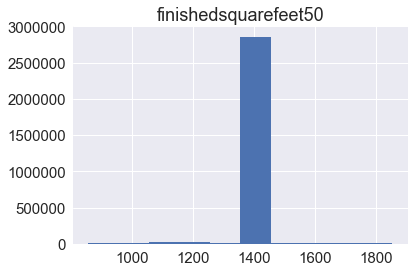

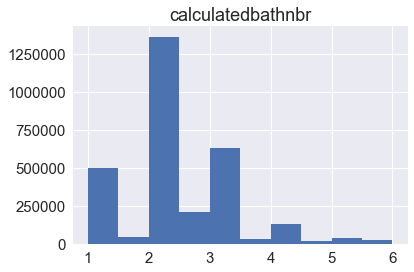

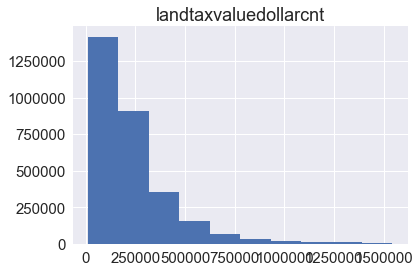

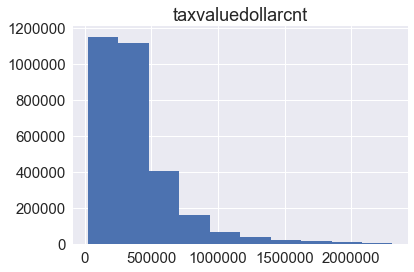

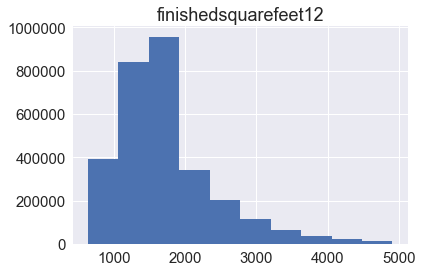

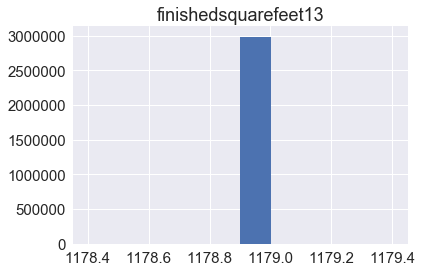

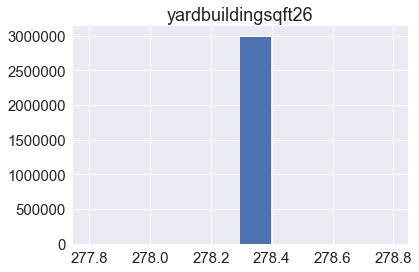

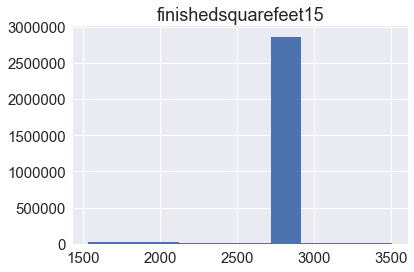

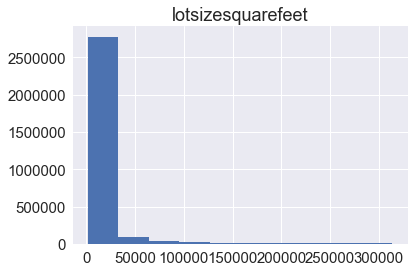

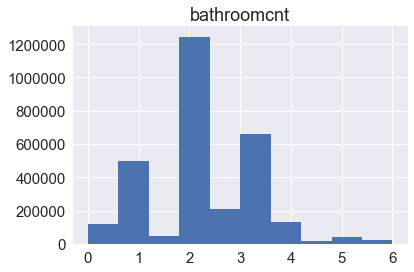

In [26]:
for column_name in non_categorical_columns_list:
    try:
        properties_2016.hist(column=column_name)
    except:
        print "%s is skipped" % column_name

### Duplicates

In [27]:
properties_2016.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    2985217
Name: parcelid, dtype: int64

In [28]:
train_2016.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    90554
2    127  
3    1    
Name: parcelid, dtype: int64

### Target variable and its correlation within the others

In [29]:
df = pd.merge(train_2016, properties_2016, on='parcelid', how='left')
df.shape

(90811, 60)

In [30]:
df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"90,811.00","90,811.00","28,781.00",261.00,"90,811.00","90,811.00","90,811.00",16.00,"90,811.00","90,811.00",...,"90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00"
mean,"12,993,597.57",0.01,1.82,7.23,646.88,2.26,3.00,4.00,5.64,2.29,...,278.30,"1,968.28",1.40,"165,813.07","419,051.81","2,015.00","250,890.84","5,479.64",13.89,"60,486,070,511,205.04"
std,"2,503,999.64",0.16,2.97,2.72,0.00,0.93,1.08,0.00,1.50,0.90,...,0.00,22.54,0.23,"127,279.32","331,797.44",0.00,"229,762.38","4,056.75",0.01,"193,059,796,866.78"
min,"10,711,738.00",-4.61,1.00,2.00,646.88,0.00,0.00,4.00,1.00,1.00,...,278.30,"1,909.00",1.00,"11,250.00","25,739.00","2,015.00","12,087.00",294.42,13.89,"60,371,060,101,021.00"
25%,"11,564,405.00",-0.03,1.00,7.00,646.88,2.00,2.00,4.00,4.00,2.00,...,278.30,"1,953.00",1.40,"82,771.00","202,180.50","2,015.00","86,798.00","2,887.74",13.89,"60,374,016,012,008.50"
50%,"12,553,718.00",0.01,1.00,7.00,646.88,2.00,3.00,4.00,5.78,2.00,...,278.30,"1,968.00",1.40,"134,426.00","346,449.00","2,015.00","198,694.00","4,566.87",13.89,"60,376,500,044,007.00"
75%,"14,237,199.00",0.04,1.00,7.00,646.88,3.00,4.00,4.00,7.00,3.00,...,278.30,"1,986.00",1.40,"204,134.50","525,025.50","2,015.00","333,229.50","6,723.61",13.89,"60,590,423,052,003.50"
max,"162,960,842.00",4.74,13.00,21.00,646.88,6.00,7.00,4.00,10.00,6.00,...,278.30,"2,010.00",2.00,"904,570.00","2,309,000.00","2,015.00","1,543,761.00","28,341.32",14.00,"61,110,078,002,002.00"


In [31]:
mean_values = df.mean(axis=0)
df.fillna(mean_values, inplace=True)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.03,2016-01-01,1.00,7.23,646.88,2.00,3.00,4.00,4.00,...,1.40,False,"122,754.00","360,170.00","2,015.00","237,416.00","6,735.88",N,13.89,"60,371,066,461,001.00"
1,14366692,-0.17,2016-01-01,1.82,7.23,646.88,3.50,4.00,4.00,5.78,...,1.40,False,"346,458.00","585,529.00","2,015.00","239,071.00","10,153.02",N,13.89,"60,484,312,212,563.77"
2,12098116,-0.00,2016-01-01,1.00,7.23,646.88,3.00,2.00,4.00,4.00,...,1.40,False,"61,994.00","119,906.00","2,015.00","57,912.00","11,484.48",N,13.89,"60,374,638,003,004.00"
3,12643413,0.02,2016-01-02,1.00,7.23,646.88,2.00,2.00,4.00,4.00,...,1.40,False,"171,518.00","244,880.00","2,015.00","73,362.00","3,048.74",N,13.89,"60,372,963,002,002.00"
4,14432541,-0.01,2016-01-02,1.82,7.23,646.88,2.50,4.00,4.00,5.78,...,2.00,False,"169,574.00","434,551.00","2,015.00","264,977.00","5,488.96",N,13.89,"60,590,423,381,006.00"
5,11509835,-0.27,2016-01-02,1.00,7.23,646.88,4.00,4.00,4.00,1.00,...,1.40,False,"880,650.00","420,478.99","2,015.00","252,478.03","27,126.57",N,13.89,"60,376,210,044,006.00"
6,12286022,0.04,2016-01-02,1.82,7.23,646.88,1.00,2.00,4.00,7.00,...,1.40,False,"64,549.00","111,521.00","2,015.00","46,972.00","2,304.97",N,13.89,"60,375,416,053,007.00"
7,17177301,0.16,2016-01-02,1.82,7.23,646.88,2.50,3.00,4.00,5.78,...,2.00,False,"107,000.00","306,000.00","2,015.00","199,000.00","3,745.50",N,13.89,"61,110,031,002,073.00"
8,14739064,-0.00,2016-01-02,1.82,7.23,646.88,1.00,2.00,4.00,5.78,...,1.40,False,"66,834.00","210,064.00","2,015.00","143,230.00","2,172.88",N,13.89,"60,590,423,151,018.00"
9,14677559,0.08,2016-01-03,1.82,7.23,646.88,2.00,2.00,4.00,5.78,...,1.00,False,"109,977.00","190,960.00","2,015.00","80,983.00","1,940.26",N,13.89,"60,590,626,483,015.00"


In [32]:
df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00",...,"90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00","90,811.00"
mean,"12,993,597.57",0.01,1.82,7.23,646.88,2.26,3.00,4.00,5.64,2.29,...,278.30,"1,968.28",1.40,"165,813.07","419,051.81","2,015.00","250,890.84","5,479.64",13.89,"60,486,070,511,205.04"
std,"2,503,999.64",0.16,1.67,0.15,0.00,0.93,1.08,0.00,1.50,0.90,...,0.00,22.54,0.23,"127,279.32","331,797.44",0.00,"229,762.38","4,056.75",0.01,"193,059,796,866.78"
min,"10,711,738.00",-4.61,1.00,2.00,646.88,0.00,0.00,4.00,1.00,1.00,...,278.30,"1,909.00",1.00,"11,250.00","25,739.00","2,015.00","12,087.00",294.42,13.89,"60,371,060,101,021.00"
25%,"11,564,405.00",-0.03,1.00,7.23,646.88,2.00,2.00,4.00,4.00,2.00,...,278.30,"1,953.00",1.40,"82,771.00","202,180.50","2,015.00","86,798.00","2,887.74",13.89,"60,374,016,012,008.50"
50%,"12,553,718.00",0.01,1.82,7.23,646.88,2.00,3.00,4.00,5.78,2.00,...,278.30,"1,968.00",1.40,"134,426.00","346,449.00","2,015.00","198,694.00","4,566.87",13.89,"60,376,500,044,007.00"
75%,"14,237,199.00",0.04,1.82,7.23,646.88,3.00,4.00,4.00,7.00,3.00,...,278.30,"1,986.00",1.40,"204,134.50","525,025.50","2,015.00","333,229.50","6,723.61",13.89,"60,590,423,052,003.50"
max,"162,960,842.00",4.74,13.00,21.00,646.88,6.00,7.00,4.00,10.00,6.00,...,278.30,"2,010.00",2.00,"904,570.00","2,309,000.00","2,015.00","1,543,761.00","28,341.32",14.00,"61,110,078,002,002.00"


In [33]:
df['transaction_month'] = df['transactiondate'].dt.month

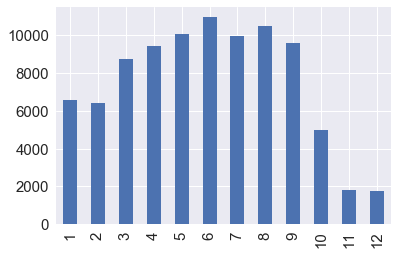

In [34]:
df.transaction_month.value_counts().sort_index().plot(kind='bar');

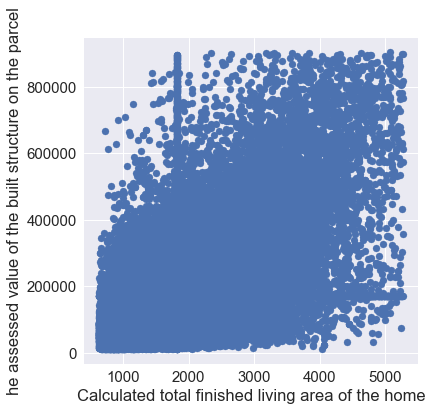

In [35]:
plt.figure(figsize=(6, 6))

xlabel = zillow_data_dictionary[zillow_data_dictionary.Feature == 'calculatedfinishedsquarefeet'].Description.to_string()[7:].strip()
ylabel = zillow_data_dictionary[zillow_data_dictionary.Feature == 'structuretaxvaluedollarcnt'].Description.to_string()[7:].strip()

plt.scatter(df.calculatedfinishedsquarefeet, df.structuretaxvaluedollarcnt)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()

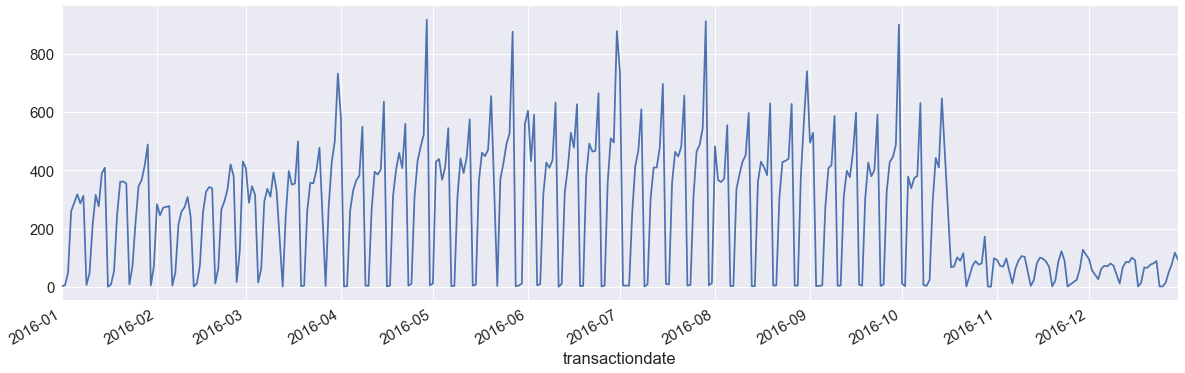

In [36]:
df.groupby('transactiondate').count()['parcelid'].plot(figsize=(20,6));

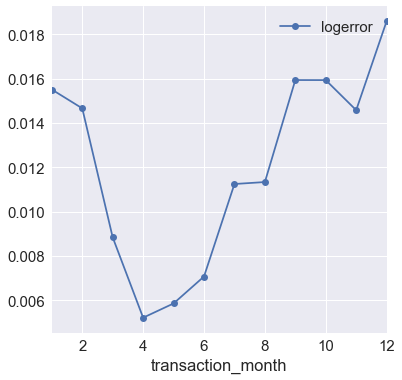

In [37]:
df[['logerror','transaction_month']].groupby('transaction_month').mean().plot(marker='o', figsize=(6,6));

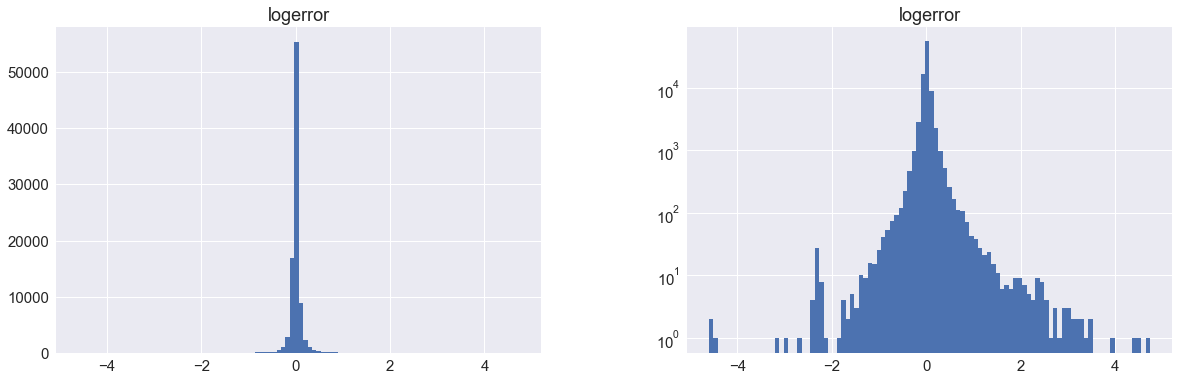

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

df.hist(column='logerror', bins=100, ax=axes[0]);
df.hist(column='logerror', log=True, bins=100, ax=axes[1]);

In [39]:
(logerror_min, logerror_max), logerror_mean = np.percentile(df.logerror, [1, 99]).tolist(), np.mean(df.logerror)
print "For logerror min/max/mean: %s, %s, %s " % (logerror_min, logerror_max, logerror_mean)

df.logerror = np.where(df.logerror < logerror_min, logerror_mean, df.logerror)
df.logerror = np.where(df.logerror > logerror_max, logerror_mean, df.logerror)

For logerror min/max/mean: -0.3567, 0.46614, 0.0108164715728 


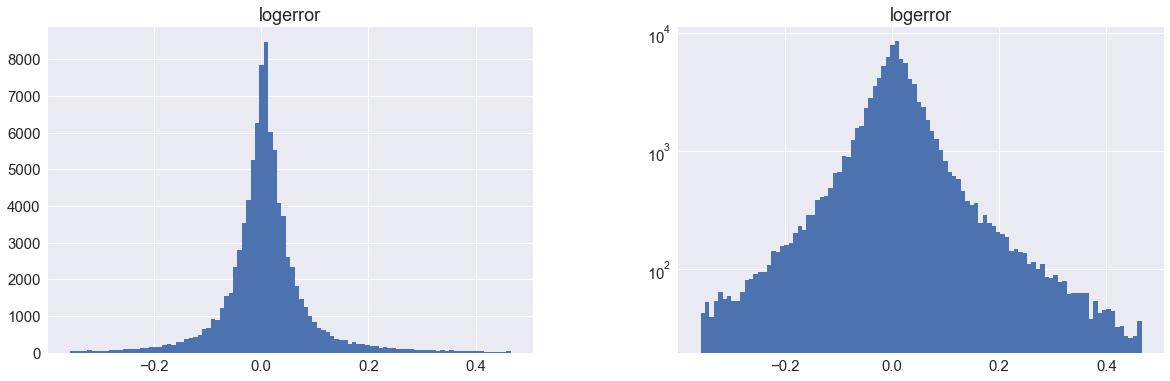

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

df.hist(column='logerror', bins=100, ax=axes[0]);
df.hist(column='logerror', log=True, bins=100, ax=axes[1]);

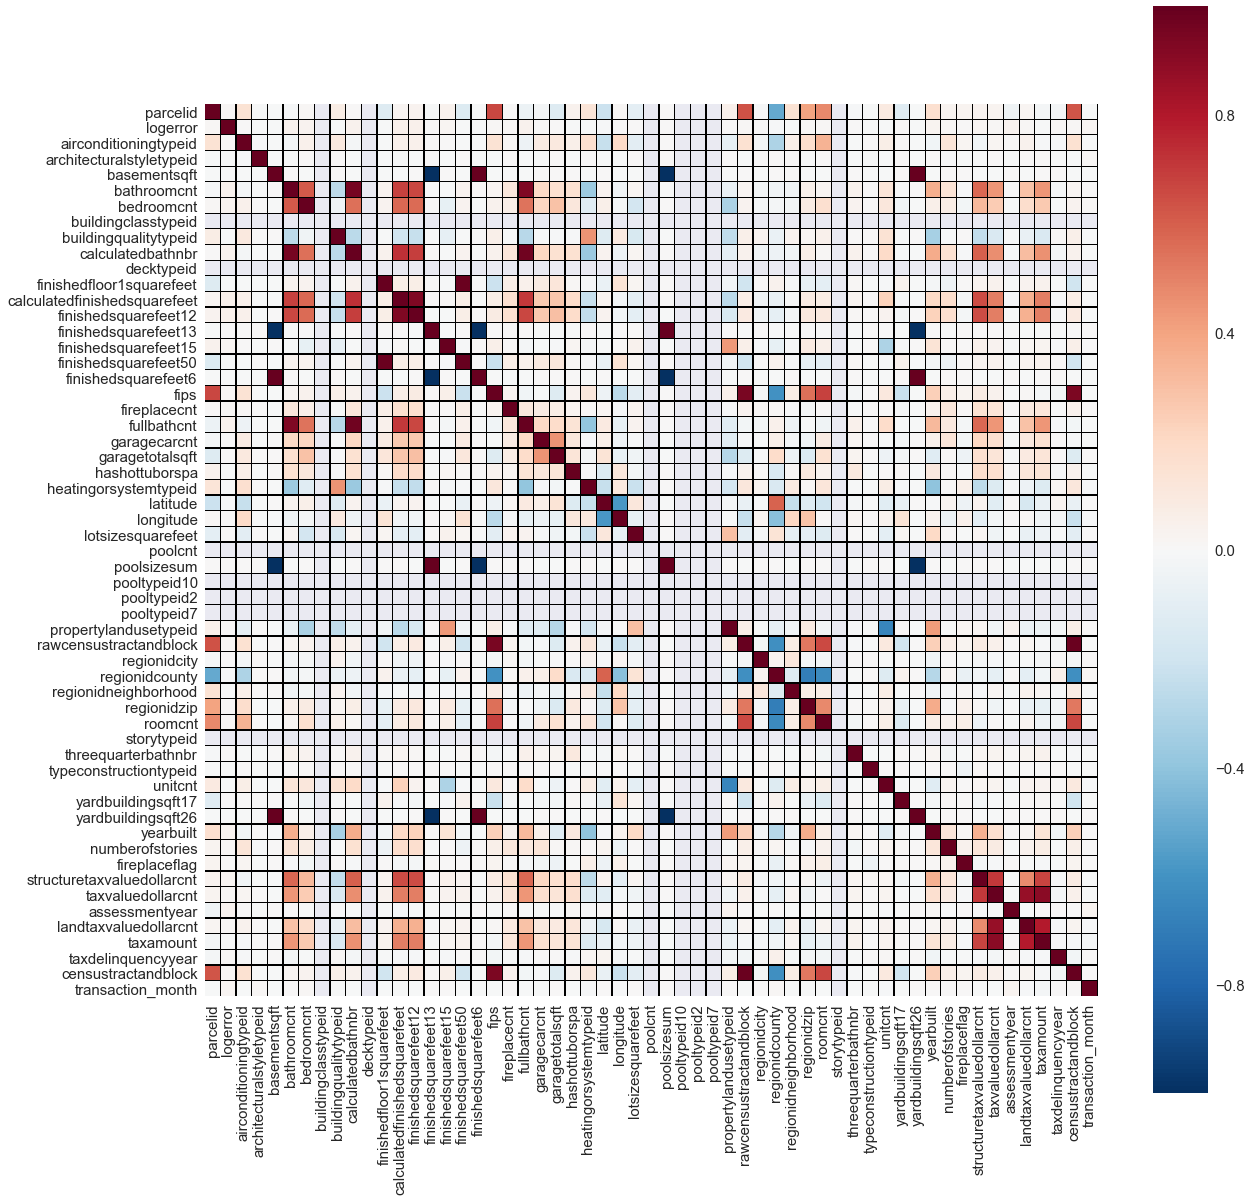

In [41]:
# Pearson Correlation Matrix
sns.heatmap(df.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black').figure.set_size_inches(20,20)